In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import e
from sklearn.metrics import accuracy_score
%matplotlib inline

---

### Define all model functions 

In [2]:
## Define the main activation function of our neural network (sigmoid for binary classification)
def sigmoid(x):
    return 1 / (1 + e ** -x)

In [3]:
## Define function for the feed forward neural network calculation with one hidden layer
def feed_forward_sigmoid(X, weights0, weights1):
    """Returns the hidden layer and the output layer of a FFNN model"""
    
    ## step 1: X data is (50,2)
    
    ## step 2: add a bias columns, so X turns from (50,2) to (50,3) with added 1s
    X = np.hstack((X,np.ones((X.shape[0],1))))
    
    ## step 3: dot product of X with weights0
    d1 = np.dot(X, weights0)
    
    ## step 4: apply sigmoid activation function to each value in d1
    s1 = sigmoid(d1)
    
    ## step 5: add bias column to the hidden layer -> this makes it (50,3), incl. bias
    h0 = np.hstack((s1, np.ones((s1.shape[0],1))))
    
    ## step 6: dot pdocut of hidden layer h1 and weights1
    d2 = np.dot(h0, weights1)
    
    ## step 7: apply sigmoid function to get the output layer
    o2 = sigmoid(d2)
    
    ## Return the hidden layer and the output layer
    return h0, o2

In [4]:
## Define function to predict results from output layer probabilities
def predict(output_probabilities):
    return np.array([np.round(x) for x in output_probabilities])

In [5]:
## Define the error of prediction
def error(ytrue, ypred):
    return ytrue - ypred

In [6]:
## Define loss function to be used for optimization
def logloss(ytrue, yprob):
    return -(ytrue*np.log(yprob)+(1-ytrue)*np.log(1-yprob))

In [7]:
## Define function that will take the derivative of our activation function (sigmoid)
def sigmoid_derivative(yhat):
    """Returns the values of sig'(yhat)"""
    sig = sigmoid(yhat)
    return sig*(1-sig)

In [8]:
## Calculate the gradient from a derivative, logloss function and error as inputs
def gradient(derivative, logloss, error):
    return derivative * logloss * error

In [9]:
## Calculate the weight_delta
def weight_delta(gradient, output_layer, learning_rate):
    return -np.dot(gradient, output_layer) * learning_rate

In [10]:
## Backpropagation main function

def backprop_training(X, y, w0, w1, epochs=10, LR1=0.01, LR2=0.01):
    """ Trains a feed forward neural network with one hidden layer.
        Requires X and y as labelled input data and initialized random weights, w0 and w1.
        You can specify the learning rate for both layers separately.
        Returns the final trained weights of the model and a history of the log-losses after each epoch."""
    
    loss_history = []
    
    for i in range(epochs):
        #1) Run network and calculate hidden layer and output layer
        hidden_layer, y_prob = feed_forward_sigmoid(X, w0, w1)
        y_prob = y_prob.reshape(50)
        y_pred = predict(y_prob)

        #2) Calculate error with logloss function
        lloss = logloss(y, y_prob)

        #3) Calculate error to determine the direction which way the gradient should go
        err = y - y_prob

        #4) Take sigmoid derivative
        sigm_prime = sigmoid_derivative(y_prob)

        #5) Calculate the gradient of the output layer
        grad1 = np.dot(sigm_prime, lloss) * err

        #6) Calculate weights delta for the output layer (w1)
        w1_delta = np.dot(grad1, hidden_layer) * LR1

        #7) Calculate gradient of hidden layer
        X_biased = np.hstack((X, np.ones((X.shape[0],1))))
        grad0 = 1 * grad1 * w1[:2]

        #8) Calculate weights delta for the hidden layer (w2)
        w0_delta = np.dot(grad0, X_biased).T * LR2

        #9) Calculate the updated output layer weights (w1)
        w1 = w1 + w1_delta.reshape(3,1)

        #10) Calculate the updated hidden layer weights (w0)
        #w0 = w0 + w0_delta
        
        # Print lloss of current run
        if i % (epochs / 10) == 0:
            print(f'Loss in epoch {i+1}: {sum(lloss)}')
        loss_history.append(sum(lloss))
    
    # Return the final weights and the loss_history over training
    return w0, w1, loss_history

---

### Run training of the model with example dataset from sklearn (make_moons)

In [11]:
#Initialize data and weights
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)
w0 = np.random.rand(3,2)
assert w0.shape == (3,2)
w1 = np.random.rand(3,1)
assert w1.shape == (3,1)

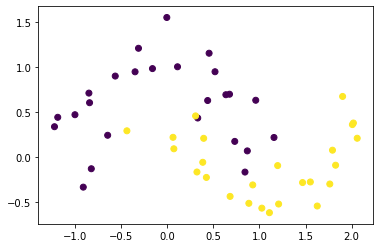

In [12]:
plt.scatter(X[:,0], X[:,1], c=y)

In [13]:
trained_w0, trained_w1, losses = backprop_training(X, y, w0, w1, epochs=100000, LR1 = 0.001, LR2 = 0.01)

Loss in epoch 1: 40.294323385558975
Loss in epoch 10001: 26.474417933006247
Loss in epoch 20001: 24.01970676670338
Loss in epoch 30001: 22.777262091635414
Loss in epoch 40001: 22.054150452992108
Loss in epoch 50001: 21.596047012822225
Loss in epoch 60001: 21.28900056543901
Loss in epoch 70001: 21.074818325498455
Loss in epoch 80001: 20.920924967686314
Loss in epoch 90001: 20.80780876546707


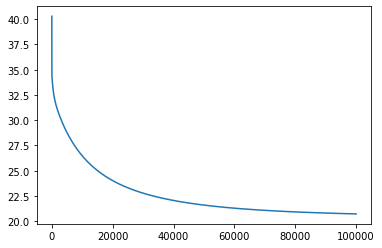

In [24]:
_ = plt.plot((losses))

In [16]:
hidden_l, y_prob = feed_forward_sigmoid(X, trained_w0, trained_w1)

In [17]:
y_pred = predict(y_prob)

In [18]:
accuracy_score(y_pred, y)

0.82

In [22]:
y_pred.flatten().shape

(50,)

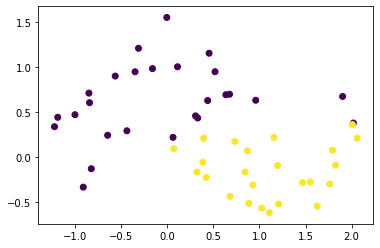

In [25]:
_ = plt.scatter(X[:,0], X[:,1], c=y_pred.flatten())

---

### Breakdown solution (for testing)

In [ ]:
#Initialize data and weights
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)
w0 = np.random.rand(3,2)
assert w0.shape == (3,2)
w1 = np.random.rand(3,1)
assert w1.shape == (3,1)

In [ ]:
X.shape, w0.shape, w1.shape

In [ ]:
#1) Run network and calculate hidden layer and output layer
hidden_layer, y_prob = feed_forward_sigmoid(X, w0, w1)
y_prob = y_prob.reshape(50)
y_pred = predict(y_prob)

In [ ]:
#2) Calculate error with logloss function
lloss = logloss(y, y_prob)

In [ ]:
#3) Calculate error to determine the direction which way the gradient should go
err = y - y_prob

In [ ]:
#4) Take sigmoid derivative
sigm_prime = sigmoid_derivative(y_prob)

In [ ]:
#5) Calculate the gradient of the last layer
grad1 = np.dot(sigm_prime, lloss) * err

In [ ]:
#6) Calcualte the weights delta for the second set of weights (weights1)
LR1 = 0.01
w1_delta = np.dot((grad1), hidden_layer) * LR1

In [ ]:
#7) Calculate gradient of hidden layer and weight delta for first set out weights
X_biased = np.hstack((X, np.ones((X.shape[0],1))))
grad0 = 1 * grad1 * w1[:2]

In [ ]:
#8) Calculate weights delta for the first layer of weights
LR2 = 0.001
w0_delta = np.dot(grad0, X_biased).T * LR2

In [ ]:
#9) Calculate the new second set of weights in our NN (weights1)
w1 = w1 + w1_delta.reshape(3,1)

In [ ]:
#10) Calculate new weight0
w0 = w0 + w0_delta

In [44]:
for i in range(0, 100001):
    if i == 0:
        print(i+1)
    else:  
        if (i) % (100000 / 10) == 0:
            print(i)

1
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
